# <span style='color:orange'>Olympic Athletes data analysis</span>

>[Click here for Questions](https://docs.google.com/document/d/1PABnGLFw8Hws1mkdsuXUf9duSzuocfLNLfSr_u4RH3I/edit?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bios = pd.read_csv('Pandas/datasets/bios.csv')
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [3]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [4]:
bios.describe()

,athlete_id,height_cm,weight_kg
count,145500.000000,106651.000000,102070.000000
mean,73686.188955,176.333724,71.890996
std,42868.960158,10.380282,14.465540
min,1.000000,127.000000,25.000000
25%,36663.750000,170.000000,62.000000
50%,73302.500000,176.000000,70.000000
75%,110306.250000,183.000000,80.000000
max,149814.000000,226.000000,198.000000


## <span style='color:white'>Level 1</span>

### What percentage of athlete records have missing height or weight?


In [5]:
# Total no. of rows
total_rows = len(bios['athlete_id'])
total_rows

145500

In [6]:
# missing weight percentage
missing_weight_rows = bios['weight_kg'].isnull().sum()
missing_weight_percent = (missing_weight_rows / total_rows) * 100
missing_weight_percent

np.float64(29.848797250859104)

In [7]:
# missing height percentage
missing_height_rows = bios['height_cm'].isnull().sum()
missing_height_percent = (missing_height_rows / total_rows) * 100
missing_height_percent 

np.float64(26.700343642611685)

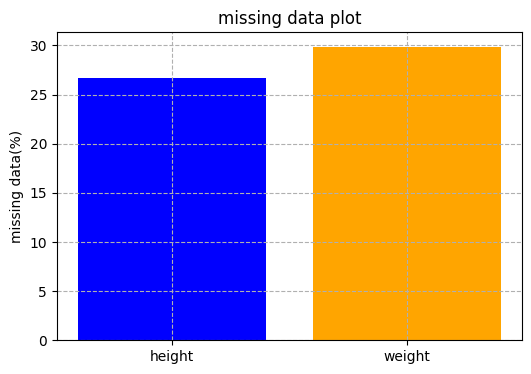

In [16]:
# plot for missing height and weight
missing_Data = {
    'height':missing_height_percent,
    'weight':missing_weight_percent
}
plt.figure(figsize = (6,4))
plt.bar(missing_Data.keys(), missing_Data.values(), color = ['blue','orange'])
plt.ylabel('missing data(%)')
plt.title('missing data plot')
plt.grid(axis = 'both', linestyle = 'dashed')
plt.show()

### Which columns suffer the most missing data, and why might that be historically?

In [9]:
bios.isnull().sum()
# died_date has most missing values because most athletes are alive...

athlete_id           0
name                 0
born_date         1807
born_city        34592
born_region      34592
born_country     34592
NOC                  1
height_cm        38849
weight_kg        43430
died_date       111560
dtype: int64

### How many athletes are alive vs deceased in the dataset?


In [10]:
# alive
alive_percent = (bios['died_date'].isnull().sum() / total_rows) * 100
alive_percent


np.float64(76.67353951890034)

In [11]:
# dead percent
dead_percent = (bios['died_date'].notnull().sum() / total_rows) * 100
dead_percent

np.float64(23.326460481099655)

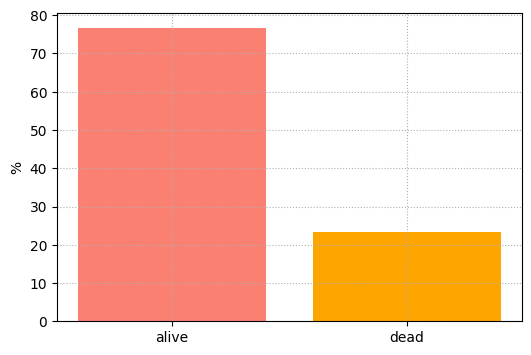

In [17]:
# dead vs alive plot
temp = {
    'alive':alive_percent,
    'dead':dead_percent
}
plt.figure(figsize = (6,4))
plt.bar(temp.keys(), temp.values(), color = ['salmon','orange'])
plt.ylabel('%')
plt.grid(axis = 'both', linestyle = 'dotted')
plt.show()

### What is the earliest and latest birth year recorded?

In [13]:
# fetching the birth year
bios['born_year'] = pd.to_datetime(bios['born_date'])

In [14]:
bios.insert(0,'birth_year',bios['born_year'].dt.year)
bios.head()

,birth_year,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_year
0,1886.0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12
1,1969.0,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01
2,1898.0,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13
3,1895.0,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11
4,1878.0,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17


In [23]:
# earliest birth year
print(bios['birth_year'].min())
# latest birth year
print(bios['birth_year'].max())

1828.0
2009.0


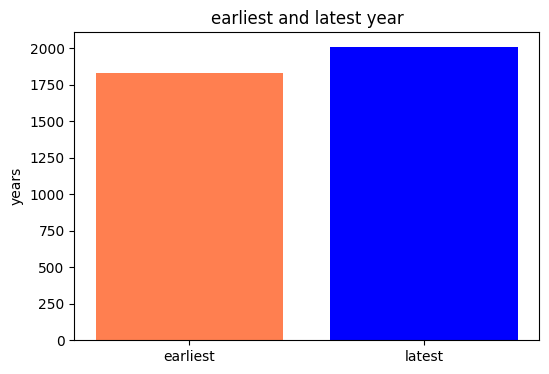

In [30]:
# plot for latest and earliest birth year
plt.figure(figsize=(6,4))
plt.bar(['earliest', 'latest'], [bios['birth_year'].min(), bios['birth_year'].max()],color = ['coral','blue'])
plt.ylabel('years')
plt.title('earliest and latest year')

plt.show()

### Are there duplicate athlete names 

In [45]:
name_counts = bios['name'].value_counts()

duplicates = name_counts[name_counts > 1]
duplicates.sort_values(ascending=False).head()

name
Ivan Ivanov      13
José González     9
Luis López        9
José Pérez        8
Luis Martínez     7
Name: count, dtype: int64

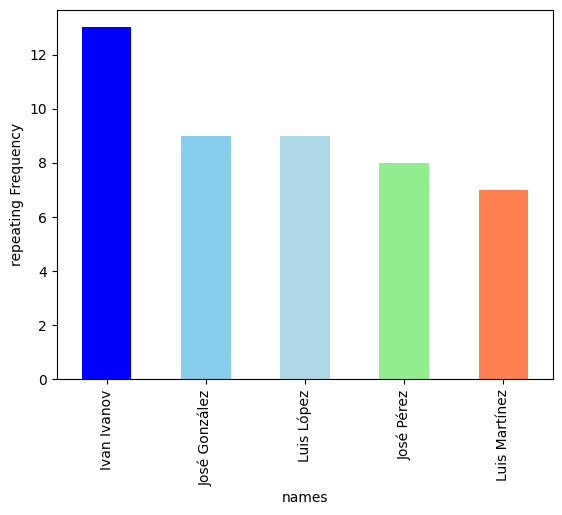

In [ ]:
# plotting top 5 diplicates name
top5_duplicates = duplicates.sort_values(ascending=False).head()
top5_duplicates.plot(kind = 'bar', color = ['blue','skyblue','lightblue','lightgreen','coral'])
plt.xlabel('names')
plt.ylabel('repeating Frequency')
plt.show()

## <span style='color:white'>Level 2</span>

### Which countries have produced the most athletes historically?

In [ ]:
by_country = bios.groupby(bios['born_country']).size()
by_country.sort_values(ascending=False)
# answer : USA

born_country
USA       9641
GER       6891
GBR       5792
FRA       5143
ITA       4709
          ... 
MRT          1
MQE          1
Elster       1
Corfu        1
Havel        1
Length: 236, dtype: int64

### How does athlete production change across decades?

In [71]:
# athlete production: birth of athlete(no alive, nor dead)
athletes_by_birthyear = bios[['name','birth_year']]
athletes_by_birthyear

,name,birth_year
0,Jean-François Blanchy,1886.0
1,Arnaud Boetsch,1969.0
2,Jean Borotra,1898.0
3,Jacques Brugnon,1895.0
4,Albert Canet,1878.0
...,...,...
145495,Polina Luchnikova,2002.0
145496,Valeriya Merkusheva,1999.0
145497,Yuliya Smirnova,1998.0
145498,André Foussard,1899.0


In [74]:
# years to decades.
bios['decade'] = (bios['birth_year'] // 10) * 10
bios['decade'].sort_values().unique()

array([1820., 1830., 1840., 1850., 1860., 1870., 1880., 1890., 1900.,
       1910., 1920., 1930., 1940., 1950., 1960., 1970., 1980., 1990.,
       2000.,   nan])

In [81]:
# athletes by decade (number of athletes born in each decade)
athletes_by_decade = bios.groupby('decade')['name'].count()
athletes_by_decade

decade
1820.0        1
1830.0        7
1840.0       35
1850.0      154
1860.0      485
1870.0     1636
1880.0     3686
1890.0     3785
1900.0     5515
1910.0     5095
1920.0     6705
1930.0     9756
1940.0    12390
1950.0    13772
1960.0    19215
1970.0    21074
1980.0    21089
1990.0    15928
2000.0     3365
Name: name, dtype: int64

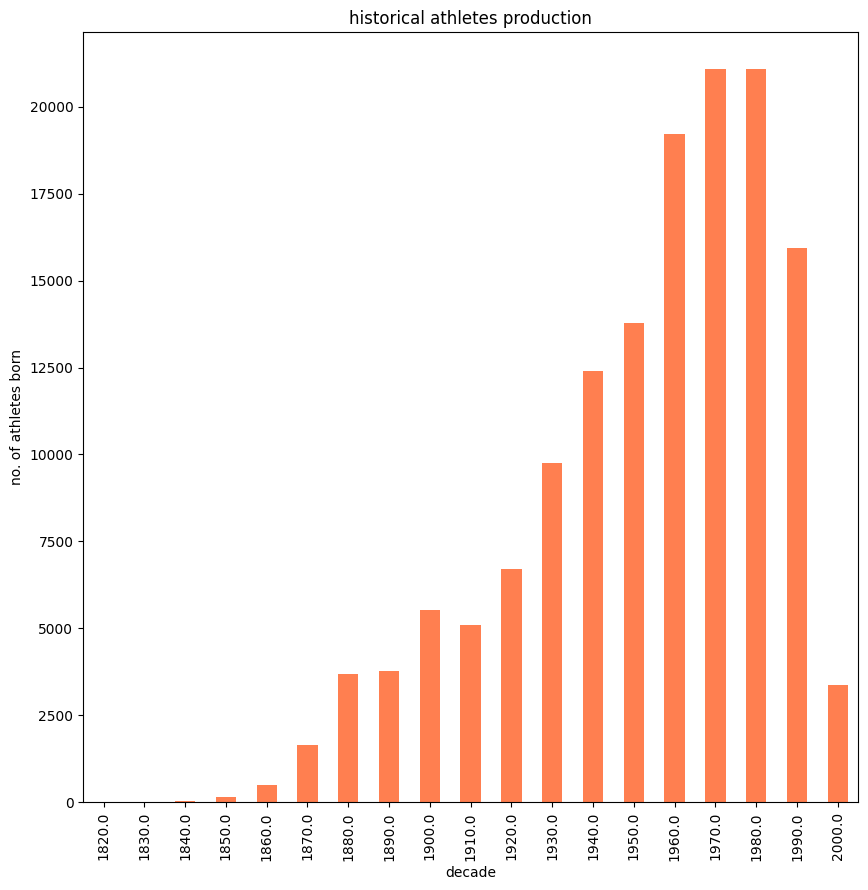

In [88]:
#  plot of deacdes of athletes production
plt.figure(figsize=(10,10))
athletes_by_decade.plot(kind='bar',color = 'coral')
plt.xlabel('decade')
plt.ylabel('no. of athletes born')
plt.title('historical athletes production')
plt.show()

### Are athlete counts concentrated in a few countries or widely distributed?


In [ ]:
# Total nations in dataset
bios['born_country'].nunique()

236

In [106]:
by_country.sort_values(ascending=False).head()

born_country
USA    9641
GER    6891
GBR    5792
FRA    5143
ITA    4709
dtype: int64

In [93]:
# plot for country-wise athletes
plt.figure(figsize=(120,80))
by_country.plot(kind='bar', color = 'orange')
plt.xlabel('nations')
plt.ylabel('no. of athletes')
plt.title('athletes distribution')
plt.show()

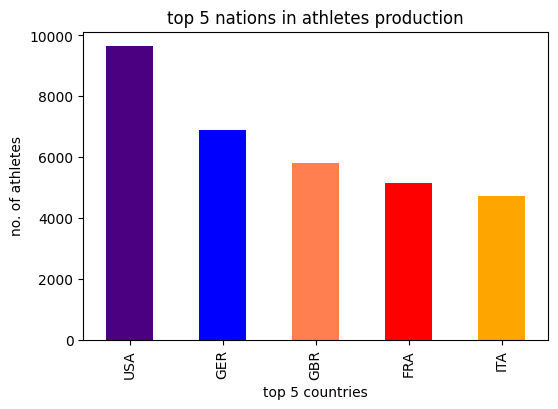

In [101]:
# top 5 countries in athletes production plot
top5_nations = by_country.sort_values(ascending=False).head()

plt.figure(figsize = (6,4))
top5_nations.plot(kind = 'bar', color = ['indigo','blue','coral','red','orange'])
plt.xlabel('top 5 countries')
plt.ylabel('no. of athletes')
plt.title('top 5 nations in athletes production')
plt.show()

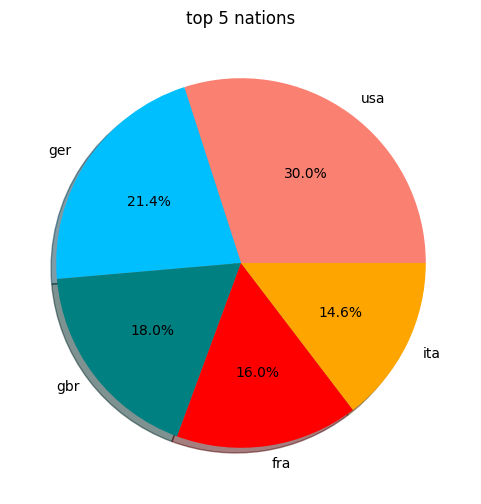

In [115]:
# percent wise distribution of top 5
usa_percent = (top5_nations.max() / top5_nations.sum()) * 100
ger_percent = ((top5_nations.sort_values(ascending=False).iloc[1]) / top5_nations.sum()) * 100
gbr_percent = ((top5_nations.sort_values(ascending=False).iloc[2]) / top5_nations.sum()) * 100
fra_percent = ((top5_nations.sort_values(ascending=False).iloc[3]) / top5_nations.sum()) * 100
ita_percent = (top5_nations.min() / top5_nations.sum()) * 100

# print(usa_percent)
# print(ger_percent)
# print(gbr_percent)
# print(fra_percent)
# print(ita_percent)


percentages = [usa_percent,ger_percent,gbr_percent,fra_percent,ita_percent]
names = ['usa','ger','gbr','fra','ita']
color = ['salmon','deepskyblue','teal','red','orange']
# pie chart of percentages
plt.figure(figsize=(6,6))
plt.pie(percentages, labels=names, autopct='%1.1f%%', colors=color, shadow=True)
plt.title("top 5 nations")
plt.show()

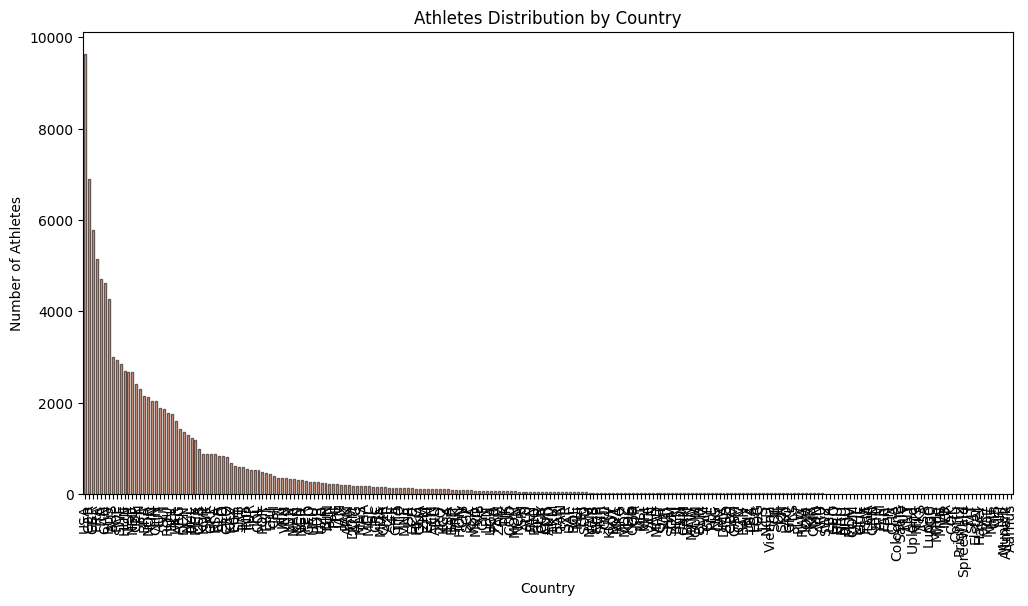

In [149]:
plt.figure(figsize=(12,6))
bios['born_country'].value_counts().plot(kind='bar', color='coral', edgecolor='black', alpha=0.6)
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.title('Athletes Distribution by Country')
plt.show()

### How many countries have produced fewer than 10 athletes?


In [121]:
by_country[by_country < 10].count()
# total 57 contries have produce less that 10 athletes

np.int64(57)

### Has global athlete participation increased post-1950?

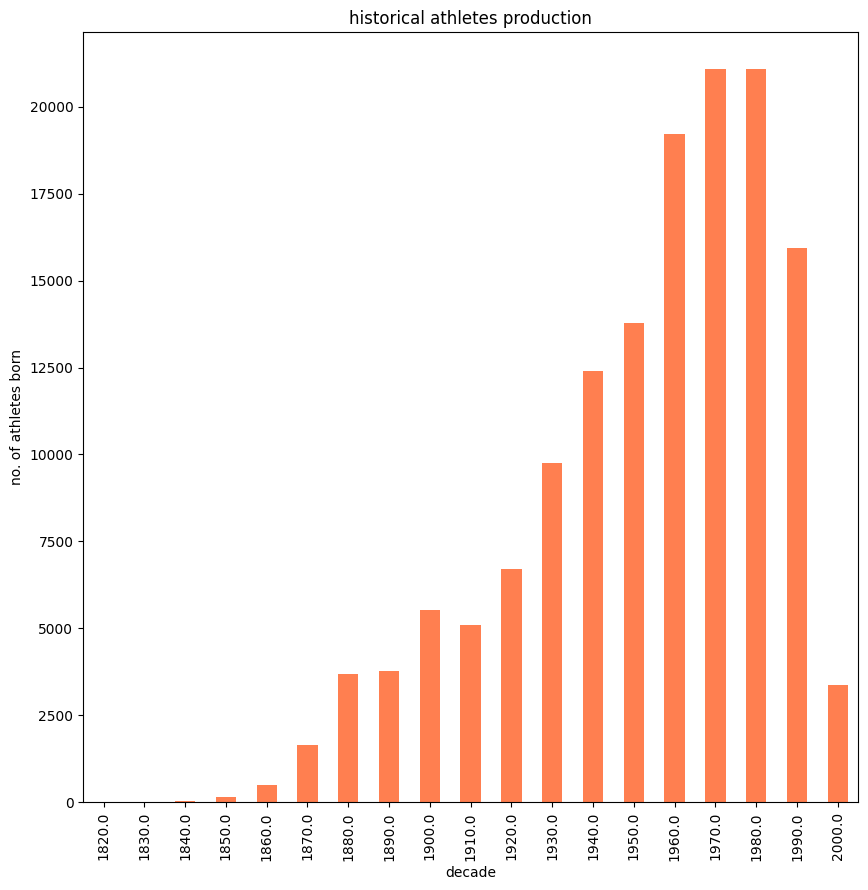

In [ ]:
# per decade athletes
plt.figure(figsize=(10,10))
athletes_by_decade.plot(kind='bar',color = 'coral')
plt.xlabel('decade')
plt.ylabel('no. of athletes born')
plt.title('historical athletes production')
plt.show()

# after 1950s, 
# athletes prticipation increased to approx 19000 in 1960s
# in 1970s, it peaked to 21000 nearly
# 1980, almost similarto previous decade, but insignificant drop
# 1990s, dropped to 15000 approx
# early 2000s, plumetted to approx 3000. significant drop
# on an average participation has increased

## <span style='color:white'>Level 3</span>

### What is the overall height distribution of athletes?

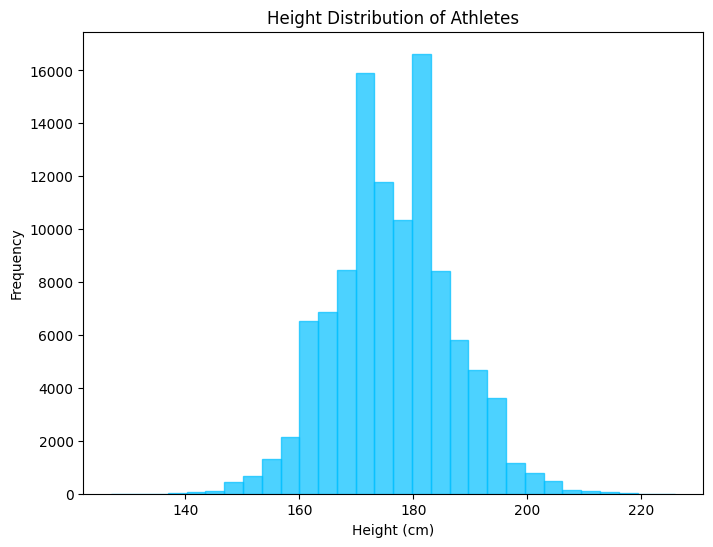

In [155]:
plt.figure(figsize=(8,6))
bios['height_cm'].dropna().plot(kind='hist', bins=30, color='deepskyblue', edgecolor='deepskyblue', alpha=0.7)
plt.title('Height Distribution of Athletes')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

### What is the weight distribution, and is it skewed?

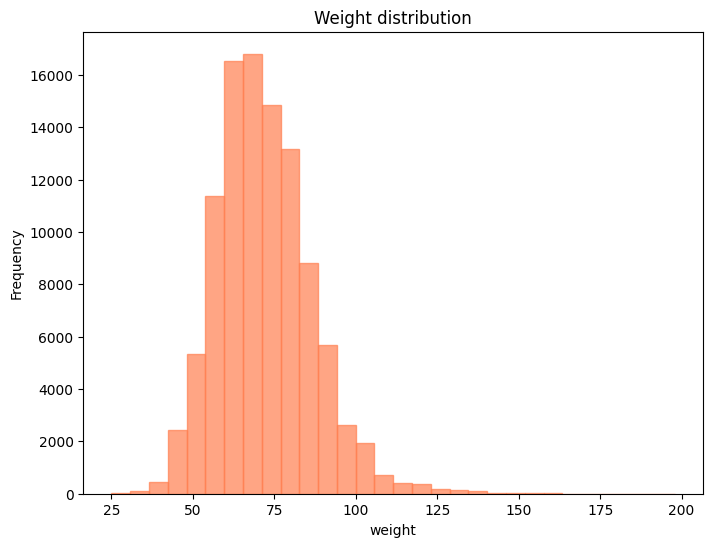

In [158]:
plt.figure(figsize=(8,6))
bios['weight_kg'].dropna().plot(kind = 'hist', bins = 30, color = 'coral', edgecolor = 'coral', alpha = 0.7)
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('Weight distribution')
plt.show()
 # yes it is skewed

### Is there a linear relationship between height and weight?

In [167]:
# y = mx + b
# Remove rows with missing height or weight

clean_bios = bios[['height_cm','weight_kg']].dropna()
x = clean_bios['height_cm'].values
y = clean_bios['weight_kg'].values

x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)
x,y

(array([ 0.64214333,  0.64214333, -0.80299277, ..., -0.89933517,
        -0.80299277, -1.2847048 ]),
 array([ 0.28405602,  0.28405602, -0.54550573, ..., -0.75289617,
        -0.47637558, -1.16767704]))

In [174]:
# calculating 'm'
numerator = np.sum((np.mean(x) - x)*(np.mean(y) - y))
denominator = np.sum((np.mean(x) - x)**2)

m = numerator / denominator
m

np.float64(0.779290332971925)

In [176]:
# calculating b
b = np.mean(y) - (m * np.mean(x))
b

np.float64(7.393370753938892e-16)

In [177]:
pred = (m*x) + b
pred

array([ 0.50041609,  0.50041609, -0.6257645 , ..., -0.70084321,
       -0.6257645 , -1.00115803])

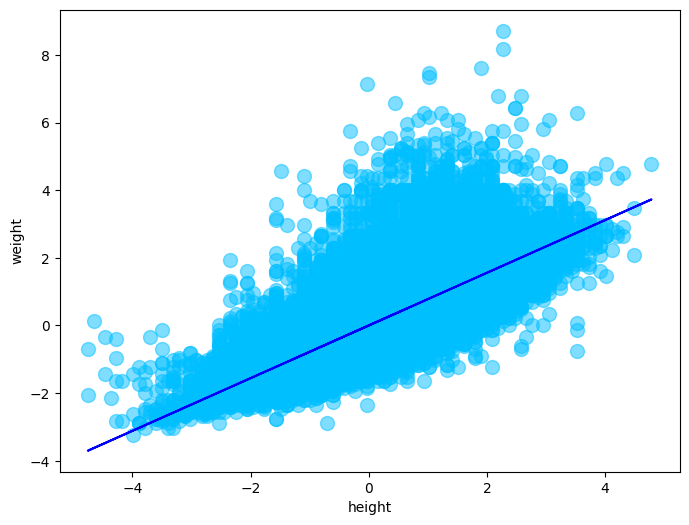

In [181]:
# weight = list(bios['weight_kg'])
# height = list(bios['height_cm'])

plt.figure(figsize=(8,6))
plt.scatter(x, y, color = 'deepskyblue', s = 100, alpha = 0.5)
plt.plot(x,pred,color='blue',label='fitted line')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()


In [ ]:
pearson_r = np.corrcoef(x, y)[0, 1]
print(f"Pearson Correlation Coefficient (r): {pearson_r}")

Pearson Correlation Coefficient (r): 0.7792903329719253
